In [1]:
import graspy
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\

In [2]:
from graspy.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05],
     [0.1, 0.4, 0.15],
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)
from graspy.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

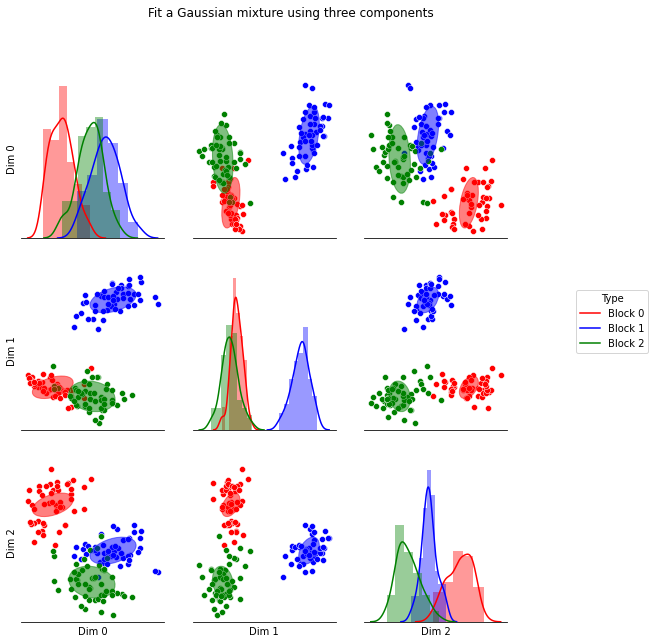

In [6]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns

color_iter = {0:'red', 1: 'blue', 2: 'green'}


def plot_results(X, gmm):
    f, axes = plt.subplots(3,3, figsize=(10, 10))    
    sns.despine(left=True)
    counter = 1
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):
            
            if k == j: 
                sns.distplot(X[Y_ == 0, k], kde=True, color=color_iter[0], ax=axes[k, k])
                sns.distplot(X[Y_ == 1, k], kde=True, color=color_iter[1],  ax=axes[k, k])
                sns.distplot(X[Y_ == 2, k], kde=True, color=color_iter[2], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:   
                
                for i, (mean, covar) in enumerate(zip(
                        means, covariances)):                   
                    v, w = linalg.eigh(covar)
                    v = 2. * np.sqrt(2.) * np.sqrt(v)
                    u = w[0] / linalg.norm(w[0])
                    
                    # as the DP will not use every component it has access to
                    # unless it needs it, we shouldn't plot the redundant
                    # components.
                    if not np.any(Y_ == i):
                        continue
                    sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k,j] )

                    # Plot an ellipse to show the Gaussian component
                    angle = np.arctan(u[1] / u[0])
                    angle = 180. * angle / np.pi  # convert to degrees
                    ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color_iter[i])
                    ell.set_clip_box(axes[k,j].bbox)
                    ell.set_alpha(0.5)
                    axes[k,j].add_artist(ell)
                    axes[k,j].set_xticks([])
                    axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(k)
                    axes[k,j].set_xlabel(k)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))

    for ax in axes.flat:
        ax.label_outer()
    f.suptitle("Fit a Gaussian mixture using three components")
    f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])],
       loc="right",   # Position of legend
     # Small spacing around legend box
       title="Type"  # Title for the legend
       )
    plt.subplots_adjust(right=.8)
   
#Fit a Gaussian mixture with EM using three components
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm)